## MDS Homework 5

**October 18, 2022** (Happy birthday to my dad!)

*Jackson Rudoff*

In [3]:
import pandas as pd
import re

### Part A

Straightforward approach here. Simply read in the data and then extract the 'narratives' column from the DataFrame. 

In [4]:
#Read in data
emergencies = pd.read_csv("data/emergency.csv", header=None, names = ['narrative'])

narratives = emergencies['narrative']
narratives

0       10 MO F FELL OUT OF SHOPPING CART;DX FRACTURED...
1                75YOF WITH LAC TO FINGER FROM METAL CAN 
2                8YOF FRACTURED FINGER FELL OFF HER BIKE 
3       9 YOM TACKLED DURING FOOTBALL PRACTICE.  DX: C...
4       PT WAS HIT ON RT SIDE WHILE PLAYING FOOTBALL D...
                              ...                        
9995    RT HIP STRAIN.9YOM WAS PLAYING FOOTBALL AND IN...
9996    16 MO MALE FELL AND HIT HEAD ON A TRAIN TABLE....
9997        RAN INTO TABLE, HIT FACE DX: FACIAL CONTUSION
9998         81YOF-HUMERUS FX-FELL DOWN 3-4 STEPS-@ HOME 
9999    30YOM PUSHING TRASH DOWN INTO A GARBAGE CAN WI...
Name: narrative, Length: 10000, dtype: object

With that, we can now just use the str method and the len() method to apply the relevant min/max method.

In [3]:
#Return longest and shortest narratives

print(narratives.str.len().max()) #longest 
print(narratives.str.len().min()) #shortest

143
17


### Part B

A little trickier here. Ultimately, we just want to make sure we capture anything that might have been misstyped. Some initial exploration reveals some cases where the data were mis-entered as "FRAC TURED" or just abbreviated "FRAC", so I am aware of needing to capture those. Thankfully, I can quickly test that a broad "FRAC" or "FRACT" query won't return false positives. 

In [38]:
[frac for frac in narratives if re.search(r'FRAC\b|FRACT\b', frac)]

['12YOF SLIPPED ON WET GRASS PLAYING KICKBALL AND HEARD A POP OR CRACK IN R ANKLE, SWELLING, LIMITED ROM DX: FRAC R LOWER LEG',
 '15 YOM TRIPPED CAUSING HIM TO SLAM AGAINST A WALL HAND FIRST.  DX: FRAC TURE FINGER.',
 '9YOM WAS PLAYING FOOTBALL, FELL, KICKED IN L THUMB, PAIN, SWELLING DX: FRAC L THUMB',
 '3YOM PT COMPLAINING OF TRIPPING OVER DOG GETTING TANGLED IN LEASH FRACT URE FEMUR DX FRACTURE#',
 '63YOF HAD FAMILY TRYING TO HELP HER WITH REMOVING SHOE CO PAIN DX FRACT URE LOWER LEG',
 '52YOF BENT OVER TO PUT ON HER SHOES AND FELL AGAINST A CAR NASAL FRACT URE',
 '13 YO M RIDING DIRT BIKE WITH HELMET AND LOST CONTROL AND CRASHED HITTI NG CHEST ON THE GROUND, PAINFUL TO BREATH. DX FRAC RIBS',
 'FRAC WRIST 7YOF FELL WHILE TUMBLING AT HOME DX: FRAC WRIST',
 '4YOF WAS PLAYING ON THE PLAYGROUND AND FELL OFF A SLIDE. DX:SKULL FRACT URE,EXTRA-AXIAL HEMORRHAGE',
 'FRAC ANKLE 57YOF FELL DOWN 12 STEPS AT PARENTS HOUSE DX: FRAC ANKLE',
 '92 YOF C/O FALL OUT OF BED ONTO FLOOR WITH INJURY TO KN

So, using wildcard with an optional quantifier will get us everything we need here, including codes with typos like misplaced characters or spaces. 

In [187]:
fractures = [frac for frac in narratives if re.search(r'FRAC.*?\b|FX.*?\b', frac)]

fractures[0:12]

['10 MO F FELL OUT OF SHOPPING CART;DX FRACTURED SKULL ',
 '8YOF FRACTURED FINGER FELL OFF HER BIKE ',
 '12YOF FELL DOWN STAIRS DX: FX RADIUS',
 '77 Y MALE HAD MECHANICAL FALL DOWN STEPS CAUSING ANKLE INJ DX; ANKLE FX',
 '34YOM-FELL DOWN INDOOR STEPS @ HOME CARRYING A DOG,TRIPPED ON SOMETHING -FELL FORWARD     DX FX DISTAL TIBIA & FIBULA',
 'FINGER FX. 20 YOM INJURED FINGER WHEN PLAYING BASKETBALL ',
 '46YOM W/CERVICAL SPINE & LUMBAR TP FXS 2/2 JUMPING 8-10 FT FROM WINDOW WHEN POLICE ENTERED HIS APT. SLID DOWN HILL. NO LOC. +COCAINE.+ BENZOS',
 'RT FIBULA FX.55YOM FELL DOWN A LADDER. ',
 '10 YO FEMALE CAUGHT FINGER IN A DOOR AT SCHOOL.  DX FX ',
 '15 YOM FELL OFF OF BIKE. DX:  L FOREARM FX.',
 'L1 COMPRESSION FX.87YOF FELL ON THE FLOOR. ',
 '6 YO MALE PLAYING FOOTBALL AND BENT PINKY BACK.  DX FX ']

In [54]:
len(fractures) # get number of narratives 

1524

There are 1524 narratives involving fractures. 

### PART C

In [188]:
fracture_str = ' '.join(fractures)
fracture_types = re.findall(r'FEMURS?|ARMS?|WRISTS?|LEGS?|FINGERS?|PINK.*?|ELBOWS?|HIPS?|F[OE]{2}T|SKULL|ANKLES?|FOREARMS?', fracture_str)

fracture_types[0:12]

['SKULL',
 'FINGER',
 'ANKLE',
 'ANKLE',
 'FINGER',
 'FINGER',
 'FINGER',
 'FOREARM',
 'FOOT',
 'PINK',
 'FINGER',
 'ELBOW']

In [69]:
len(fracture_types)

1347

In [71]:
fracture_types = [re.sub(r'S$', '', word) for word in fracture_types]
fracture_types = [re.sub(r'EE', 'OO', word) for word in fracture_types]

len(fracture_types)



1347

In [72]:
[word for word in fracture_types if re.findall(r'S$|EE', word)] # no plurals

[]

In [78]:
types_df  = pd.Series(fracture_types)
types_df = types_df.value_counts().rename_axis('Parts').reset_index(name = 'Counts')
types_df

,Parts,Counts
0,FINGER,220
1,FOOT,220
2,WRIST,191
3,ANKLE,178
4,ARM,144
5,HIP,108
6,ELBOW,102
7,LEG,76
8,FOREARM,59
9,FEMUR,25


In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

I really did not know how to interpret the plotting aspect of this question since a bar plot seemed more like what would be appropriate, but I will go ahead and do both to be safe.

[[<matplotlib.axis.YTick at 0x16b5d25e0>,
 Text(0.5, 0, 'Fracture Frequency'),
 Text(0, 0.5, 'Occurrences')]

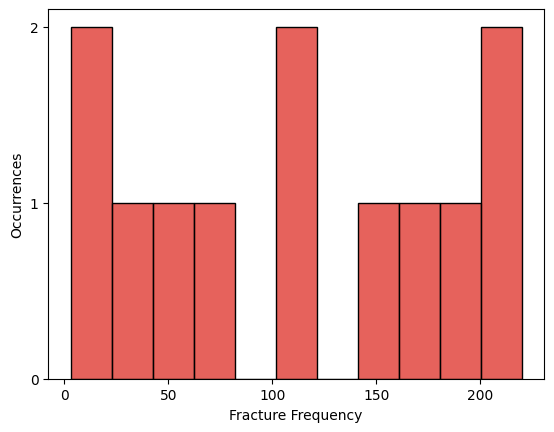

In [95]:
hist = sns.histplot(x = 'Counts', data= types_df, bins= 11, color='#de2d26')

hist.set(yticks=range(3), xlabel='Fracture Frequency', ylabel='Occurrences')

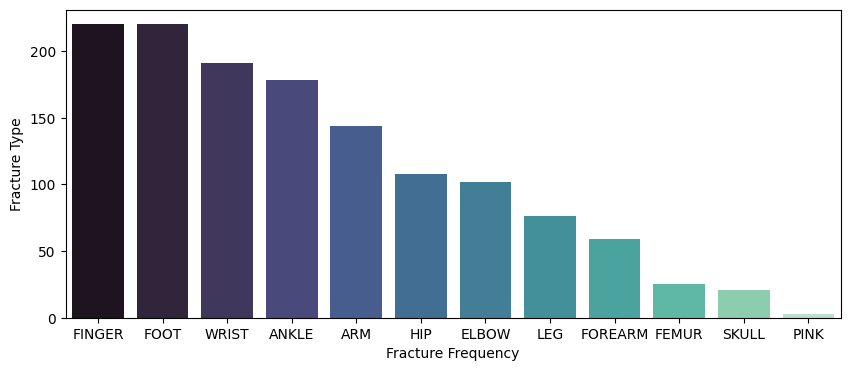

In [108]:
plt.figure(figsize=(10,4))
hist = sns.barplot(x = 'Parts', y = 'Counts', data= types_df, hue='Parts', palette='mako', dodge=False)

hist.set(xlabel='Fracture Frequency', ylabel='Fracture Type')
hist.legend([],[], frameon=False)

### PART D

I will be completely honest, my method here is pretty un-elegant and roundabout. However, it still applies the *re* techniques we learned this past week and it gets the job done. 

I decided to filter for male and female codes independently, because I discovered some codes do not contain a gender and need to be excluded.

In [185]:
narratives_male = [word for word in narratives if re.search(r'\b(\d+)\s*(M|Y.?|MONTH|YEAR)\s*(O|OLD)?\s*(M|MALE)\b', word)]
len(narratives_male)

4615

In [184]:
narratives_female = [word for word in narratives if re.search(r'\b(\d+)\s*(M|Y.?|MONTH|YEAR)\s*(O|OLD)?\s*(F|FEMALE)\b', word)]
len(narratives_female)

3538

There are 3538 men and 4615 women in the data. 

Here's where it gets a little roundabout. I decided to loop through these two lists and have it find the ages expressed in months and divide those by 12 and convert to type float. I also noticed that some of the codes contain secondary instances of abbreviatated times followed by "AGO", which meant that for this step I also had to use the full *re* again to avoid capturing the wrong string. I also discovered there was an issue where it was accidentally picking up "MM" injuries, so I filtered for that when converting the ages. 

In [179]:
ages_female = []
for string in narratives_female:
    if re.search(r'\b(\d+)\s*(M|MONTH)\s*(O|OLD)?\s*(F|FEMALE)\b', string):
        tmp = re.search(r'\b(\d+)', string)
        tmp2 = tmp.group(0)
        ages_female.append(float(tmp2)/12)
    else:
        tmp = re.search(r'\b(\d+)', string)
        tmp2 = tmp.group(0)
        ages_female.append(float(tmp2))


ages_male = []
for string in narratives_male:
    if re.search(r'\b(\d+)\s*(M|MONTH)\s*(O|OLD)?\s*(M|MALE)\b', string):
        if re.search(r'\dMM', string): #filter for specific bug where it gets injuries with MM
            continue
        tmp = re.search(r'\b(\d+)', string)
        tmp2 = tmp.group(0)
        ages_male.append(float(tmp2)/12)
    else:
        tmp = re.search(r'\b(\d+)', string)
        tmp2 = tmp.group(0)
        ages_male.append(float(tmp2))



In [183]:
male_df = pd.DataFrame(ages_male)
male_df['gender'] = 'M'

final_df = pd.DataFrame(ages_female)
final_df['gender'] = 'F'
final_df = pd.concat([male_df, final_df], ignore_index=True).rename(columns= {0: 'Age', 'gender': 'Gender'})

final_df = final_df.groupby('Gender').value_counts().reset_index(name= 'Count')
final_df['Age_Group'] = pd.cut(x=final_df['Age'], bins=[0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 109, 120])

final_df[final_df['Age'] < 3] #check that filter worked

,Gender,Age,Count,Age_Group
0,F,2.000000,131,"(0, 9]"
82,F,1.000000,17,"(0, 9]"
87,F,1.666667,16,"(0, 9]"
90,F,1.833333,14,"(0, 9]"
91,F,1.916667,14,"(0, 9]"
95,F,1.750000,14,"(0, 9]"
96,F,1.500000,13,"(0, 9]"
97,F,0.750000,12,"(0, 9]"
98,F,1.583333,11,"(0, 9]"
99,F,1.416667,10,"(0, 9]"


Now that we have a usable, grouped dataframe, we can plot the count of injuries by age group for each gender. 

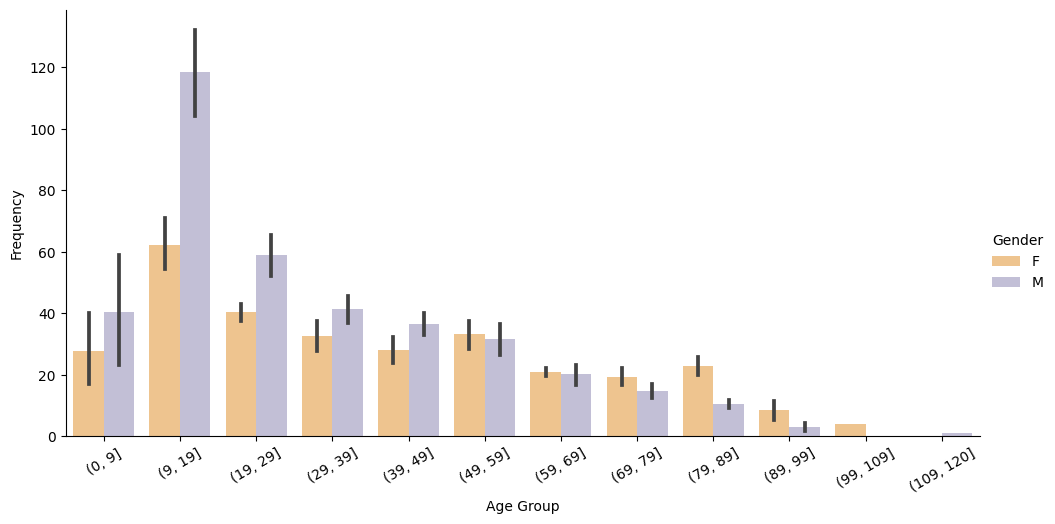

In [182]:
import seaborn as sns

cat = sns.catplot(x = 'Age_Group', y = 'Count', hue= 'Gender', palette = 'PuOr',data = final_df, kind='bar', aspect=2)
cat.set_xticklabels(rotation=30)
cat.set(xlabel = 'Age Group', ylabel = 'Frequency')

